In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import the daily shelter occupancy stats for the years 2017-2019
df = pd.read_csv('shelter_use_totals_without_families__daily.csv')
df.head()

,Date,capacity,occupancy,vacancy
0,2017-01-01,3503,3265,238
1,2017-01-02,3548,3270,278
2,2017-01-03,3577,3268,309
3,2017-01-04,3607,3396,211
4,2017-01-05,3629,3367,262


In [3]:
# Reset the index
# df = df.reset_index()
# Change the name of the date field to match what I used in functions below
df.rename(columns={'Date': 'Year_Month_Day', 'occupancy': 'OCCUPANCY' }, inplace=True)
df.head()

,Year_Month_Day,capacity,OCCUPANCY,vacancy
0,2017-01-01,3503,3265,238
1,2017-01-02,3548,3270,278
2,2017-01-03,3577,3268,309
3,2017-01-04,3607,3396,211
4,2017-01-05,3629,3367,262


In [4]:
# Set the date as a the index
df.set_index('Year_Month_Day', inplace=True)
df.head()

,capacity,OCCUPANCY,vacancy
Year_Month_Day,,,
2017-01-01,3503,3265,238
2017-01-02,3548,3270,278
2017-01-03,3577,3268,309
2017-01-04,3607,3396,211
2017-01-05,3629,3367,262


In [5]:
# *******************************************************
# Add weather data
dfw17 = pd.read_csv('en_climate_daily_ON_6158355_2017_P1D.csv')
dfw18 = pd.read_csv('en_climate_daily_ON_6158355_2018_P1D.csv')
dfw19 = pd.read_csv('en_climate_daily_ON_6158355_2019_P1D.csv')

In [6]:
# Concatenate into one dataframe
dfw=pd.concat([dfw17,dfw18,dfw19])
# Clean up missing values - remove them. 
# Remove days with no temp data
#dfw = dfw[dfw.'Max Temp Flag' != 'M']
dfw.drop(dfw.index[dfw['Max Temp Flag'] == 'M'], inplace = True)
dfw.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,NaN,3.1,...,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,NaN,5.5,...,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,NaN,4.8,...,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2017-01-04,2017,1,4,NaN,3.8,...,NaN,M,0.6,NaN,NaN,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2017-01-05,2017,1,5,NaN,-5.3,...,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M


In [7]:
# Drop empty columns
dfw.drop(['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain (mm)','Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'], axis = 1) 

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,3.1,-0.5,1.3,16.7,0.0,0.0,3.0,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,5.5,0.7,3.1,14.9,0.0,0.0,3.0,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,4.8,2.4,3.6,14.4,0.0,11.3,1.0,M
3,-79.4,43.67,TORONTO CITY,6158355,2017-01-04,2017,1,4,3.8,-7.6,-1.9,19.9,0.0,0.6,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2017-01-05,2017,1,5,-5.3,-10.3,-7.8,25.8,0.0,0.0,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-79.4,43.67,TORONTO CITY,6158355,2019-12-27,2019,12,27,11.6,3.8,7.7,10.3,0.0,0.0,0.0,M
361,-79.4,43.67,TORONTO CITY,6158355,2019-12-28,2019,12,28,4.5,2.8,3.7,14.3,0.0,0.0,1.0,M
362,-79.4,43.67,TORONTO CITY,6158355,2019-12-29,2019,12,29,3.4,1.2,2.3,15.7,0.0,6.9,1.0,M
363,-79.4,43.67,TORONTO CITY,6158355,2019-12-30,2019,12,30,9.0,1.4,5.2,12.8,0.0,10.3,NaN,M


In [8]:
# In preparaton for combining the data, set the a proper date column.
dfw['Year_Month_Day']=pd.to_datetime(dfw['Date/Time']).dt.to_period('D')

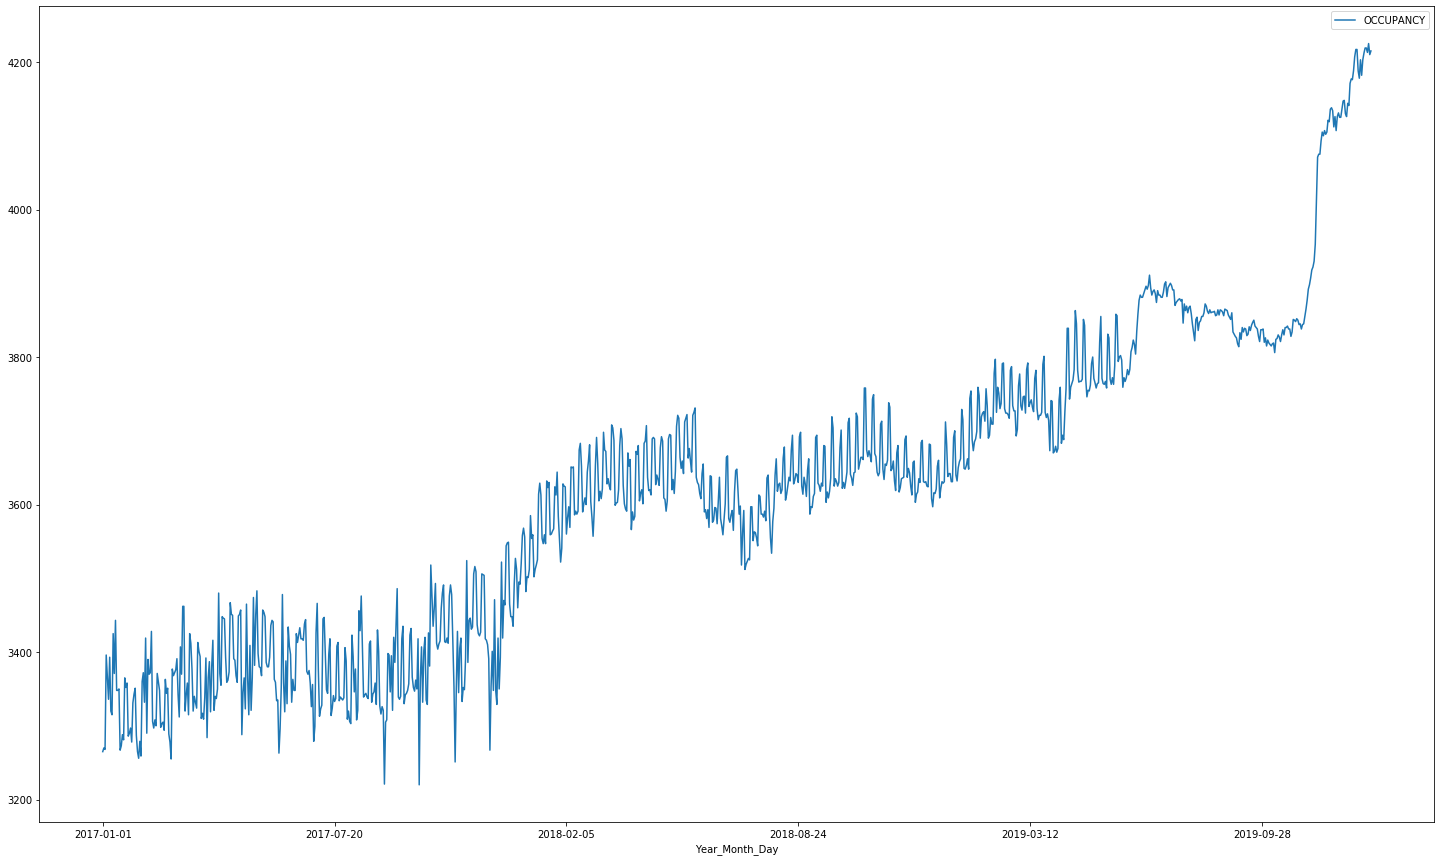

In [9]:
# Plot Occupancy
ax = df.reset_index().plot(x='Year_Month_Day', y='OCCUPANCY', figsize=(25,15))
ax

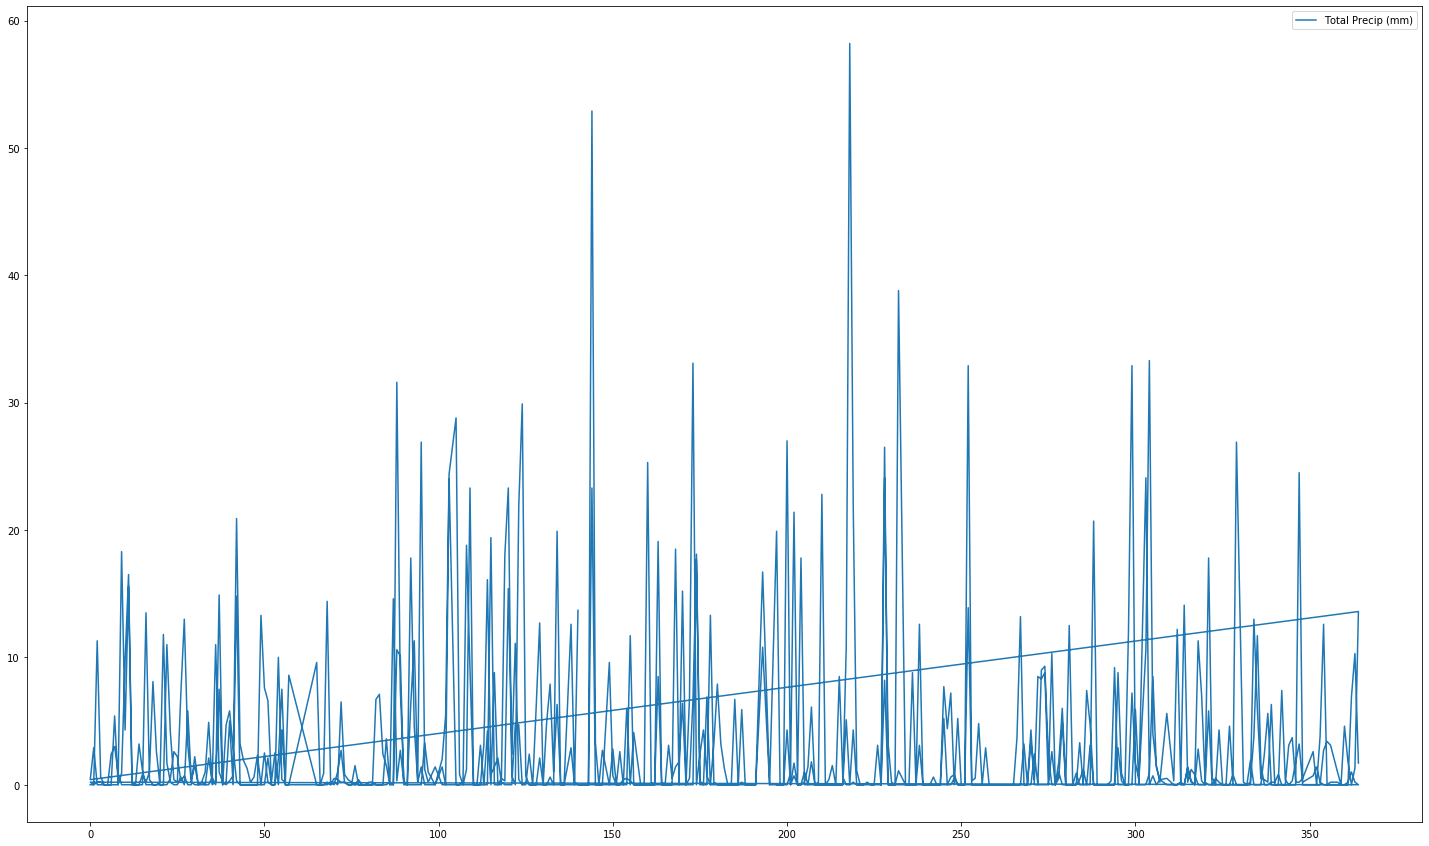

In [10]:
# Long term growth trend, some seasonality seems apparent.
#********************
# Now plot precipitation
axw = dfw.plot(y='Total Precip (mm)', figsize=(25,15))

In [11]:
# In preparation for statistical analysis, merge the Weather & Shelter data
dfw.set_index('Year_Month_Day', inplace=True)

In [12]:
# Before doing the merge, reset both indicies
df.reset_index(inplace=True)
#dfw.reset_index(inplace=True)

In [13]:
df.head()

,Year_Month_Day,capacity,OCCUPANCY,vacancy
0,2017-01-01,3503,3265,238
1,2017-01-02,3548,3270,278
2,2017-01-03,3577,3268,309
3,2017-01-04,3607,3396,211
4,2017-01-05,3629,3367,262


In [14]:
# To run additional analysis, bring the two datasets into a single dataframe
merged_df = pd.concat([df, dfw], axis=1, sort=False)
merged_df.head()

,Year_Month_Day,capacity,OCCUPANCY,vacancy,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2017-01-01,3503.0,3265.0,238.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,3548.0,3270.0,278.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,3577.0,3268.0,309.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-04,3607.0,3396.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-05,3629.0,3367.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
merged_df.set_index('Year_Month_Day', inplace=True)

In [16]:
merged_df.head()

,capacity,OCCUPANCY,vacancy,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Year_Month_Day,,,,,,,,,,,,,,,,,,,,,
2017-01-01,3503.0,3265.0,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,3548.0,3270.0,278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,3577.0,3268.0,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,3607.0,3396.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,3629.0,3367.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


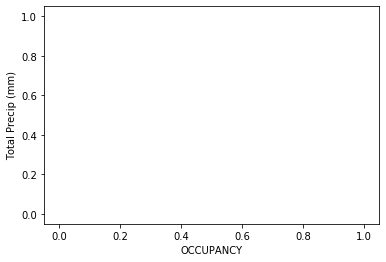

In [17]:
# Scatter plot with Occupancy and Total Precipitation
ax = merged_df.plot.scatter(x='OCCUPANCY', y='Total Precip (mm)')

In [ ]:
# We need to de-trend this data. We'll try two methods
# 1. Statistical
# 2. Taking a sample where capacity is held constant.

# *********************************************************
# 1. Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
# We'll use additive & multiplicative decomposition then compare.
merged_df.interpolate(inplace = True)
merged_df.index=merged_df.index.to_timestamp()
result_mul = seasonal_decompose(merged_df['OCCUPANCY'], model='multiplicative')

# And to compare, do Additive as well
# Additive model
result_add = seasonal_decompose(merged_df['OCCUPANCY'], model='additive')

In [ ]:
plt.figure(figsize=(20,10))
p1 = result_add.plot()
p2 = result_mul.plot()
#plt.figure(figsize=(20,10))
plt.show()

In [ ]:
detrended_mul = merged_df.OCCUPANCY.values - result_mul.trend
detrended_add = merged_df.OCCUPANCY.values - result_add.trend
fig=plt.figure(figsize=(20,15))
plt.plot(detrended_mul)
#plt.figure(figsize=(20,10))
plt.title('Occupancy detrended by subtracting the trend component - multiplicative method', fontsize=16)

In [ ]:
fig=plt.figure(figsize=(20,15))
plt.plot(detrended_add)
#plt.figure(figsize=(20,10))
plt.title('Occupancy detrended by subtracting the trend component - additive method', fontsize=16)

In [ ]:
# Ok, the transformation has successfully removed the growth trend. The Occupancy though
# though it highly erratic in 2017 for some reason.
# Check to see if remaining noise is white noise
# Take the residuals and remove NaNs
residual1 = result_mul.resid.dropna()
residual2 = result_add.resid.dropna()

In [ ]:
# Calculate means
mu1 = residual1.mean()
mu2 = residual2.mean()

In [ ]:
# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(residual1)
ax2.hist(residual2)

# Add titles
ax1.set_title('Additive')
ax2.set_title('Multiplicative')

# Add vertical lines to highlight the means
ax1.axvline(x = mu1, 
            color='r', 
            linestyle='dashed', 
            linewidth=2)

ax2.axvline(x = mu2, 
            color='r', 
            linestyle='dashed', 
            linewidth=2)

plt.show()

In [ ]:
# Results are very similar - spread is nearly identical. 
# Assess the independence by calculating autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1)

pd.plotting.autocorrelation_plot(residual1, ax = ax1)
pd.plotting.autocorrelation_plot(residual2, ax = ax2)

# Add titles
ax1.set_title('Additive')
ax2.set_title('Multiplicative')

plt.subplots_adjust(hspace = 0.9)
plt.show()

In [ ]:
# Both models show similar autocorrelation. Either model could be used.
# Remove the trend from the signal a different way
merged_df['detrended'] = merged_df.OCCUPANCY / result_mul.trend
merged_df['deseasoned'] = merged_df.OCCUPANCY / result_mul.seasonal

fix, (ax1, ax2) = plt.subplots(2, 1)
merged_df['detrended'].plot(ax = ax1)
merged_df['deseasoned'].plot(ax = ax2)

ax1.set_ylabel('N')
ax2.set_ylabel('N')

ax1.set_title('Detrended')
ax2.set_title('Deseasoned')

plt.subplots_adjust(hspace = 0.9)
plt.show()


In [ ]:
trend_strength = 1. - np.var(result_mul.resid) / np.var(result_mul.resid * result_mul.trend)
seasonality_strength = 1. - np.var(result_mul.resid) / np.var(result_mul.resid + result_mul.seasonal)

In [ ]:
print ('Strength of trend is: %1.3f' % trend_strength)
print ('Strength of seasonality is: %1.3f' % seasonality_strength)

In [ ]:
# The strength of the trend is far greater than the strength of seasonality
# So we'll use de-trended data to do OLS Regression
# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm
# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

In [ ]:
# Let's rename Total Precip(mm) & Min Temp (°C) - it may cause us trouble later
merged_df.rename(columns={'Total Precip (mm)':'TotalPrecipmm', 'Min Temp (°C)':'MinTempCelsius'}, inplace=True)

In [ ]:
cm = merged_df.corr(method = 'pearson')
# Print correlation matrix
cm

In [ ]:
# Calculate the means of x, y

mu_x = merged_df["detrended"].mean()
mu_y = merged_df["TotalPrecipmm"].mean()

print(mu_x, mu_y)

In [ ]:
# Calculate the standard deviations of x, y

sig_x = merged_df["detrended"].std()
#df1["x"].mean()np.std(x)
sig_y = merged_df["TotalPrecipmm"].std()

print(sig_x, sig_y)

In [ ]:
beta_1 = sig_y/sig_x * cm.loc['detrended', 'TotalPrecipmm']
beta_0 = mu_y - beta_1 * mu_x

print(beta_0, beta_1)

In [ ]:
#Fit the regression model using the OLS method
# Initialize the regression model

m = sm.ols('TotalPrecipmm ~ detrended', data = merged_df)

In [ ]:
# Fit the regression model

m = m.fit()

In [ ]:
# Print the regression parameters

m.params

In [ ]:
# Visualize our results.
# Calculate estimates of y

intercept, slope = m.params
merged_df['y_est'] = intercept + slope * merged_df.detrended

In [ ]:
# Plot the estimates along the actual observations

plt.plot(merged_df.detrended, merged_df.TotalPrecipmm, 'o', label = 'Observations')
plt.xlabel('Detrended Occupancy')
plt.ylabel('TotalPrecipmm')

# Draw estimates
plt.plot(merged_df.detrended, merged_df.y_est, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

In [ ]:
# Show the model summary

m.summary()

In [ ]:
# The R-squared and Adjusted R-squared values show no correlation at all between Total
# Precipitation and the detrended Occupancy data.

# Let's do the same with tempurature.
# Now plot tempurature
axw = merged_df.plot(x = 'Date/Time', y='MinTempCelsius', figsize=(25,15))

In [ ]:
# Same x, input a new y
mu_y2 = merged_df["MinTempCelsius"].mean()

print(mu_x, mu_y2)

In [ ]:
# Calculate the standard deviations of the new y

sig_y2 = merged_df["MinTempCelsius"].std()

print(sig_x, sig_y2)

In [ ]:
beta_1 = sig_y2/sig_x * cm.loc['detrended', 'MinTempCelsius']
beta_0 = mu_y2 - beta_1 * mu_x

print(beta_0, beta_1)

In [ ]:
#Fit the regression model using the OLS method
# Initialize the regression model

m2 = sm.ols('MinTempCelsius ~ detrended', data = merged_df)

In [ ]:
# Fit the regression model

m2 = m2.fit()

In [ ]:
# Print the regression parameters

m2.params

In [ ]:
# Visualize our results.
# Calculate estimates of y2

intercept, slope = m2.params
merged_df['y2_est'] = intercept + slope * merged_df.detrended

In [ ]:
# Plot the estimates along the actual observations

plt.plot(merged_df.detrended, merged_df.MinTempCelsius, 'o', label = 'Observations')
plt.xlabel('Detrended Occupancy')
plt.ylabel('MinTempCelsius')

# Draw estimates
plt.plot(merged_df.detrended, merged_df.y2_est, 'r+', label='Estimates')

# Add legend
plt.legend()
plt.show()

In [ ]:
# Show the model summary for Extreme Cold

m2.summary()

In [ ]:
# No correlation at all.
# Last attempt - isolate the days with some precipitation (precip >= 2mm) and the tempurature is near freezing
# (-10 to +1)
NearZero_Precip = merged_df[(merged_df['TotalPrecipmm'] >= 2) & (merged_df['MinTempCelsius'] >-10) & (merged_df['MinTempCelsius'] <= 1)]

In [ ]:
NearZero_Precip.info()

In [ ]:
NearZero_Precip.head()

In [ ]:
ax5 = NearZero_Precip.reset_index().plot(x='Year_Month_Day', y='OCCUPANCY',figsize=(30,10))

In [ ]:
ax6 = NearZero_Precip.reset_index().plot(x='Year_Month_Day', y='TotalPrecipmm',figsize=(30,10))

In [ ]:
ax5 = NearZero_Precip.reset_index().plot(x='Year_Month_Day', y='MinTempCelsius',figsize=(30,10))

In [ ]:
# Apply multiple regression
from sklearn import linear_model
# here we have 2 variables for multiple regression.
X = NearZero_Precip[['TotalPrecipmm','MinTempCelsius']] 
Y = NearZero_Precip['OCCUPANCY']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
import statsmodels.api as sm2

model = sm2.OLS(Y, X).fit()
predictions = model.predict(X) 

In [ ]:
print_model = model.summary()
print(print_model)